In [21]:
# Step 0: Install and load Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [22]:
# Step 1: Load the dataset and Explore the data
# 1. Load the mtcars.csv dataset into a dataframe df
df = pd.read_csv("mtcars.csv")
df = df[["car_model","mpg", "hp"]] # keep only relevant columns

# 2. Study the dataset
print("First 5 rows:")
print(df.head(), "\n")

print("Dataset info:")
print(df.info(), "\n")

print("Summary:")
print(df.describe(), "\n")

print("Check for missing values:")
print(df.isnull().sum(), "\n")


First 5 rows:
           car_model   mpg   hp
0          Mazda RX4  21.0  110
1      Mazda RX4 Wag  21.0  110
2         Datsun 710  22.8   93
3     Hornet 4 Drive  21.4  110
4  Hornet Sportabout  18.7  175 

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_model  32 non-null     object 
 1   mpg        32 non-null     float64
 2   hp         32 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 900.0+ bytes
None 

Summary:
             mpg          hp
count  32.000000   32.000000
mean   20.090625  146.687500
std     6.026948   68.562868
min    10.400000   52.000000
25%    15.425000   96.500000
50%    19.200000  123.000000
75%    22.800000  180.000000
max    33.900000  335.000000 

Check for missing values:
car_model    0
mpg          0
hp           0
dtype: int64 



Observation:
- 'car_model' column contains string data
- 'mpg' and 'hp' are numeric columns
- There are no missing values
- 'mpg' and 'hp' have different scales, which may affect clustering

In [23]:
# 3. Create a new dataframe called cars to hold numeric data only
cars = df.drop(columns = ["car_model"])

print("Numeric dataframe:")
print(cars.head())
print("\nData types:")
print(cars.dtypes)

Numeric dataframe:
    mpg   hp
0  21.0  110
1  21.0  110
2  22.8   93
3  21.4  110
4  18.7  175

Data types:
mpg    float64
hp       int64
dtype: object


In [24]:

# Step 2: Use k-means algorithm to find clusters in the data
# 1. Normalize the cars dataset
scaler = StandardScaler()
cars_normalized = scaler.fit_transform(cars)

# Confirm normalization (show top 10 rows)
print("Top 10 normalized:")
print(pd.DataFrame(cars_normalized, columns = cars.columns).head(10))

Top 10 normalized:
        mpg        hp
0  0.153299 -0.543655
1  0.153299 -0.543655
2  0.456737 -0.795570
3  0.220730 -0.543655
4 -0.234427  0.419550
5 -0.335572 -0.617748
6 -0.976163  1.456847
7  0.726459 -1.254944
8  0.456737 -0.765933
9 -0.150138 -0.351014


In [25]:

# 2. Run k-means for k=3, k=10, and k=20
np.random.seed(42)

km3 = KMeans(n_clusters = 3, random_state = 42).fit(cars_normalized)
km10 = KMeans(n_clusters = 10, random_state = 42).fit(cars_normalized)
km20 = KMeans(n_clusters = 20, random_state = 42).fit(cars_normalized)

In [26]:
# Print predictions and cluster centers
print("\nK = 3 Predictions:")
print(km3.labels_)
print("\nK = 3 Cluster Centers:")
print(km3.cluster_centers_)

print("\nK = 10 Predictions:")
print(km10.labels_)
print("\nK = 10 Cluster Centers:")
print(km10.cluster_centers_)

print("\nK = 20 Predictions:")
print(km20.labels_)
print("\nK = 20 Cluster Centers:")
print(km20.cluster_centers_)



K = 3 Predictions:
[2 2 2 2 0 2 0 1 2 2 2 0 0 0 0 0 0 1 1 1 2 0 0 0 0 1 1 1 0 0 0 2]

K = 3 Cluster Centers:
[[-0.78960469  0.89275477]
 [ 1.54525829 -1.0834728 ]
 [ 0.10272622 -0.5807012 ]]

K = 10 Predictions:
[3 3 3 3 6 8 2 1 3 8 8 0 0 0 5 5 2 4 4 4 3 0 0 2 6 1 1 9 2 6 7 3]

K = 10 Cluster Centers:
[[-0.70306882  0.31581995]
 [ 0.97932334 -1.09194053]
 [-0.93823285  1.47166539]
 [ 0.27130259 -0.64103379]
 [ 2.04697368 -1.2697629 ]
 [-1.63361037  0.93819827]
 [-0.15013833  0.41954967]
 [-0.85815908  2.79051468]
 [-0.29061864 -0.43992515]
 [ 1.737917   -0.49919927]]

K = 20 Predictions:
[ 3  3 11  3  6  8  2  1 11 15 15  0  0  0  5  5 16  4 17 18 19 12 12  2
  6 10 14  9 13  6  7  3]

K = 20 Cluster Centers:
[[-0.6390098   0.49364233]
 [ 0.72645879 -1.25494437]
 [-1.06045072  1.45684686]
 [ 0.18701441 -0.5473595 ]
 [ 2.07506974 -1.19567025]
 [-1.63361037  0.93819827]
 [-0.15013833  0.41954967]
 [-0.85815908  2.79051468]
 [-0.33557233 -0.61774753]
 [ 1.737917   -0.49919927]
 [ 1.21533

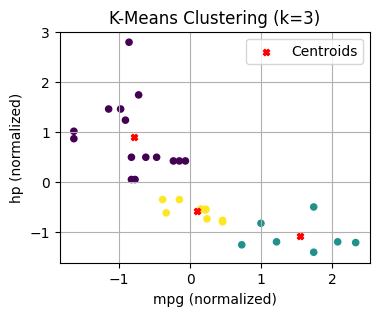

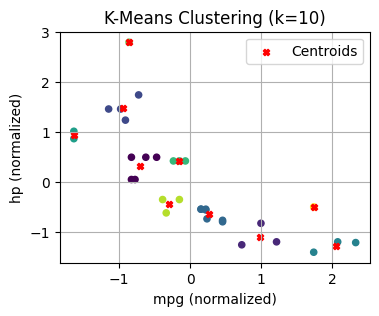

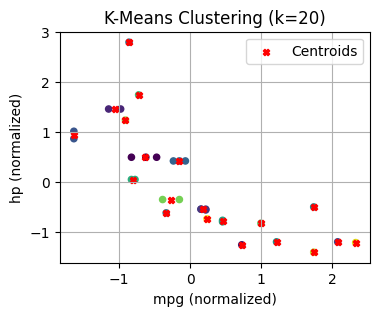

In [27]:
# 3. Visualize clusters based on mpg and hp
def plot_clusters(model, data, title):
    plt.figure(figsize = (4, 3))
    plt.scatter(
        data[:, 0], data[:, 1],
        c = model.labels_,
        cmap = "viridis", s = 20)
    plt.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:, 1],
        color = "red", marker = "X", s = 20,
        label = "Centroids")
    plt.xlabel("mpg (normalized)")
    plt.ylabel("hp (normalized)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_clusters(km3, cars_normalized, "K-Means Clustering (k=3)")
plot_clusters(km10, cars_normalized, "K-Means Clustering (k=10)")
plot_clusters(km20, cars_normalized, "K-Means Clustering (k=20)")

Observaion:
- The scatter plots show how cars cluster in mpg vs hp space.

- Red “X” marks are cluster centroids.

- From visual inspection, k=3 often produces the most interpretable clusters with this 2D dat. k=10 or k=20 may overfit small variations.

## Repeat step 1 to 3 but with all the features in the cars dataset and use the resulting clusters for the following steps.

In [28]:

# Step 1: Load the dataset and Explore the data
# 1. Load the mtcars.csv dataset into a dataframe df
df=[]
df = pd.read_csv("mtcars.csv")

# 3. Create a new dataframe called cars to hold numeric data only
cars_full = df.drop(columns = ["car_model"])
print("Full numeric dataframe:")
print(cars_full.head())

# Step 2: Use k-means algorithm to find clusters in the data
# 1. Normalize the cars dataset
scaler_full = StandardScaler()
cars_full_normalized = scaler_full.fit_transform(cars_full)
print("\nTop 10 normalized:")
print(pd.DataFrame(cars_full_normalized, columns = cars_full.columns).head(10))

# 2. Run k-means for k=3, k=10, and k=20
np.random.seed(42)
km_full = KMeans(n_clusters = 3, random_state = 42).fit(cars_full_normalized)

Full numeric dataframe:
    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2

Top 10 normalized:
        mpg       cyl      disp        hp      drat        wt      qsec  \
0  0.153299 -0.106668 -0.579750 -0.543655  0.576594 -0.620167 -0.789601   
1  0.153299 -0.106668 -0.579750 -0.543655  0.576594 -0.355382 -0.471202   
2  0.456737 -1.244457 -1.006026 -0.795570  0.481584 -0.931678  0.432823   
3  0.220730 -0.106668  0.223615 -0.543655 -0.981576 -0.002336  0.904736   
4 -0.234427  1.031121  1.059772  0.419550 -0.848562  0.231297 -0.471202   
5 -0.335572 -0.106668 -0.046906 -0.617748 -1.589643  0.252064  1.348220   
6 -0.976163  1.031121  1.059772  1.456847

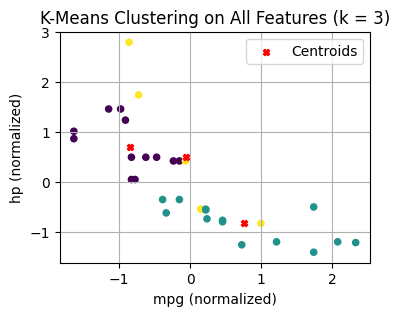

In [29]:
# 3. Visualize clusters based on mpg and hp
plt.figure(figsize = (4, 3))
plt.scatter(cars_full_normalized[:, cars_full.columns.get_loc("mpg")],
            cars_full_normalized[:, cars_full.columns.get_loc("hp")],
            c = km_full.labels_, cmap = "viridis", s = 20)
plt.scatter(km_full.cluster_centers_[:, cars_full.columns.get_loc("mpg")],
            km_full.cluster_centers_[:, cars_full.columns.get_loc("hp")],
            color = "red", marker = "X", s = 20, label = "Centroids")
plt.xlabel("mpg (normalized)")
plt.ylabel("hp (normalized)")
plt.title("K-Means Clustering on All Features (k = 3)")
plt.legend()
plt.grid(True)
plt.show()

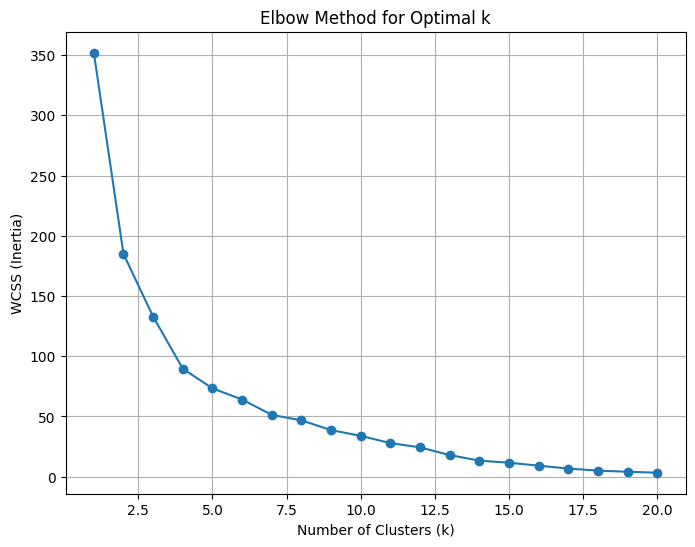

In [30]:

# Step 4: Finding the optimal k for k-means
# Perform a grid search
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Elbow Method
wcss = []
K_range = range(1, 21)

for k in K_range:
    km = KMeans(n_clusters = k, random_state = 42).fit(cars_full_normalized)
    wcss.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize = (8,6))
plt.plot(K_range, wcss, marker = "o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


Observation:
- The “elbow” is where the WCSS curve starts to flatten.

- This is usually the optimal k.

In [31]:
# Model score for the optimal k
# GridSearch
pipeline = Pipeline([
    ("kmeans", KMeans(random_state = 42))
])

param_grid = {"kmeans__n_clusters": range(1, 21)}

grid_clf = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 1)
grid_clf.fit(cars_full_normalized)

# Best k and model score
print(f"Optimal number of clusters (k): {grid_clf.best_params_["kmeans__n_clusters"]}")
print(f"Grid search score for optimal k: {grid_clf.best_score_}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Optimal number of clusters (k): 19
Grid search score for optimal k: -45.56286284712153


Observations:
- Elbow Method: Helps visualize where adding more clusters doesn’t significantly improve compactness.

- GridSearchCV: Searches over k=1 to 20 and returns the best k automatically.

In [32]:
# Step 5: Dimensionality Reduction – Principal Component Analysis
pca = PCA()
pca.fit(cars_full_normalized)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Derive the minimum number of dimensions required to preserve 95% of the dataset variance
d = np.argmax(cumulative_variance >= 0.95) + 1

In [34]:
# Print results
print("Dimension d for 95% variance preservation:", d)
print("Significance of dimensionality reduction:", (11 - d) / 11 * 100, "% reduction in dimensions")


Dimension d for 95% variance preservation: 6
Significance of dimensionality reduction: 45.45454545454545 % reduction in dimensions


In [35]:
# Derive the X_reduced dataframe
# Transform the full normalized data to reduced dimensions
X_reduced = pca.transform(cars_full_normalized)[:, :d]

# Load into dataframe
X_reduced_df = pd.DataFrame(X_reduced, columns = [f"PC{i+1}" for i in range(d)])
print("\nReduced dataset (first 5 rows):")
print(X_reduced_df.head())


Reduced dataset (first 5 rows):
        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.657213 -1.735446 -0.601199  0.115522 -0.960653  0.017259
1 -0.629396 -1.550033 -0.382322  0.202307 -1.032949  0.245592
2 -2.779397  0.146457 -0.241238 -0.249139  0.405143  0.354348
3 -0.311771  2.363019 -0.135759 -0.511862  0.557997 -0.019606
4  1.974489  0.754402 -1.134402  0.075653  0.210836 -0.151580


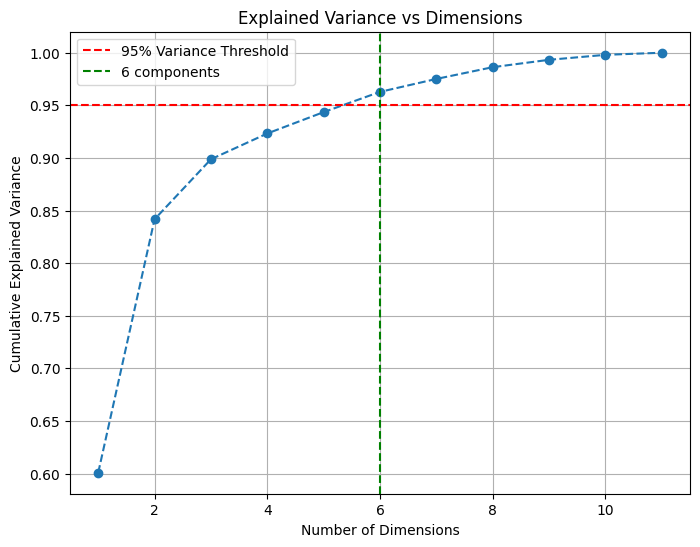

In [37]:
# Plot Explained Variance vs Dimensions curve
plt.figure(figsize = (8,6))
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker = "o", linestyle = "--")
plt.axhline(
    y = 0.95, color = "r",
    linestyle = "--",
    label = "95% Variance Threshold")
plt.axvline(
    x = d, color = "g",
    linestyle = "--",
    label = f"{d} components")
plt.xlabel("Number of Dimensions")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Dimensions")
plt.legend()
plt.grid(True)
plt.show()

Observations:
- d gives the minimum number of principal components to preserve 95% of variance.

- Dimensionality reduction reduces computational cost and noise.

- Benefits: Simplifies data, speeds up algorithms, may improve model performance.

- Disadvantages: Some interpretability loss and possible information loss if variance threshold is too low.